In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

# adding path to GPR_for_IM directory in order to import relevant scripts
import sys
sys.path.append('../')
import cov_tools as cov
import obs_tools as obs

In [2]:
# for plotting:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

# Binned Covariance

In this notebook, we show how to calculate the frequency covariance, binned by frequency separation, as also seen here, in this example from the ps_eor code: https://gitlab.com/flomertens/ps_eor/-/blob/master/doc/GPR%20theory%20and%20practice.ipynb.

We will calculate the binned covariance for our HI cosmological data, and compare it to different kernels.

In [3]:
# loading HI data:
HI_data = np.load('../Data/T_HI-MDSAGE_z_0.39.npy')
HI_data = np.swapaxes(HI_data, 1, 2)

# smoothing HI data:
lx,ly,lz = 1000,1000, 924.78 #Mpc/h
zmax = 0.58
sigma_beam = 1.55
HI_data_smoothed = obs.ConvolveCube(HI_data,zmax,lx,ly, sigma_beam, cosmo)

Calculate binned covariance matrix.

In [4]:
df = 1 # frequency resolution
bins, cov_21 = cov.binned_covariance(HI_data_smoothed, df)

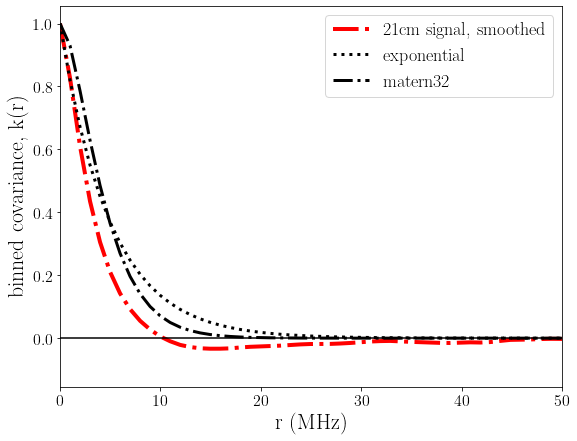

In [5]:
plt.figure(figsize=(9,7))

plt.plot(bins, cov_21, lw=4, c='red', ls='dashdot', label='21cm signal, smoothed')
plt.plot(bins, GPy.kern.Exponential(1).K_of_r(bins / 5),lw=3,c='k',ls='dotted', label='exponential')
plt.plot(bins, GPy.kern.Matern32(1).K_of_r(bins / 4),lw=3,c='k',ls='dashdot', label='matern32')

plt.axhline(0, c='k')

plt.xlim(0, 50)
plt.xlabel('r (MHz)', fontsize=22)
plt.ylabel('binned covariance, k(r)', fontsize=22)
plt.legend(fontsize=18)